In [2]:
#Importing Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data
data=pd.read_csv(r'Diwali Sales Data.csv',encoding='latin1')
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# Data Cleaning

In [4]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Check for missing values
data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
# Drop unnecessary columns
data=data.drop(columns=['Status','unnamed1','Age'],axis=1)

In [7]:
# Check for duplicated Product_ID
data.Product_ID.duplicated().sum()

8900

In [8]:
# Display rows with missing Amount values
data[data.Amount.isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [9]:
# Display information for a specific Product_ID
data[data.Product_ID=='P00269542']

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
184,1005538,Kartik,P00269542,F,46-50,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
1544,1002857,Sukant,P00269542,F,26-35,0,Uttar Pradesh,Central,Media,Footwear & Shoes,4,16176.0
3774,1004406,Jenna,P00269542,F,26-35,1,Maharashtra,Western,Banking,Food,3,11422.0
4429,1003118,Dhirajendu,P00269542,F,26-35,0,Uttar Pradesh,Central,Healthcare,Electronics & Gadgets,4,9841.0
5362,1004021,Aishwarya,P00269542,F,51-55,1,Gujarat,Western,Lawyer,Furniture,3,8378.0
6948,1006005,Dona,P00269542,M,26-35,1,Madhya Pradesh,Central,Hospitality,Clothing & Apparel,2,7118.0


In [10]:
# Check for duplicated rows
data.duplicated().sum()

8

In [11]:
# Display duplicated rows
data[data.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


In [12]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [13]:
# Display the shape of the cleaned dataset
data.shape

(11243, 12)

In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

In [15]:
# Display counts of unique values for Product_ID
data.Product_ID.value_counts()

P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
             ..
P00257642     1
P00078242     1
P00333542     1
P00206642     1
P00296942     1
Name: Product_ID, Length: 2350, dtype: int64

In [16]:
# Display data types of columns
data.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [17]:
# Display counts of Gender values
data.Gender.value_counts()

F    7828
M    3403
Name: Gender, dtype: int64

In [18]:
# Display counts of Age Group values
data['Age Group'].value_counts()

26-35    4536
36-45    2282
18-25    1878
46-50     983
51-55     829
55+       427
0-17      296
Name: Age Group, dtype: int64

In [19]:
# Display counts of Marital_Status values
data.Marital_Status.value_counts()

0    6514
1    4717
Name: Marital_Status, dtype: int64

In [20]:
# Display counts of Product_Category values
data.Product_Category.value_counts()

Clothing & Apparel       2653
Food                     2490
Electronics & Gadgets    2082
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Decor                      96
Auto                       96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

In [21]:
# Create a copy of the cleaned dataset
cleand_data=data.copy()

In [22]:
# Drop User_ID and Cust_name columns
data=data.drop(columns=['User_ID','Cust_name'],axis=1)

In [23]:
cleand_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [24]:
data

,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,P00125942,F,26-35,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,P00110942,F,26-35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,P00118542,F,26-35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,P00237842,M,0-17,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,P00057942,M,26-35,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...
11246,P00296942,M,18-25,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,P00171342,M,26-35,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,P00201342,F,36-45,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,P00059442,M,36-45,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [25]:
#Checking the mean,std,min,max
data[['Orders','Amount']].describe()

,Orders,Amount
count,11231.000000,11231.000000
mean,2.489093,9454.084982
std,1.114880,5221.728776
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12677.500000
max,4.000000,23952.000000


# Exploratory Data Analysis

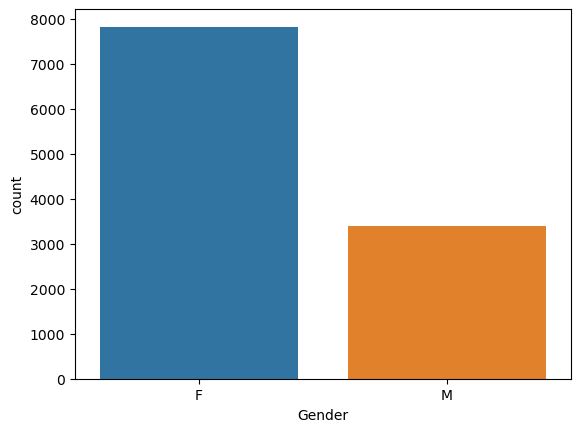

In [42]:
# Countplot for Gender
sb.countplot(data['Gender'])
plt.show()

In [27]:
# Analyze selling amount percentage by gender
gender_sale=data.groupby('Gender')['Amount'].sum()
total_amount=gender_sale.sum()
percentage_sale=(gender_sale/total_amount)*100

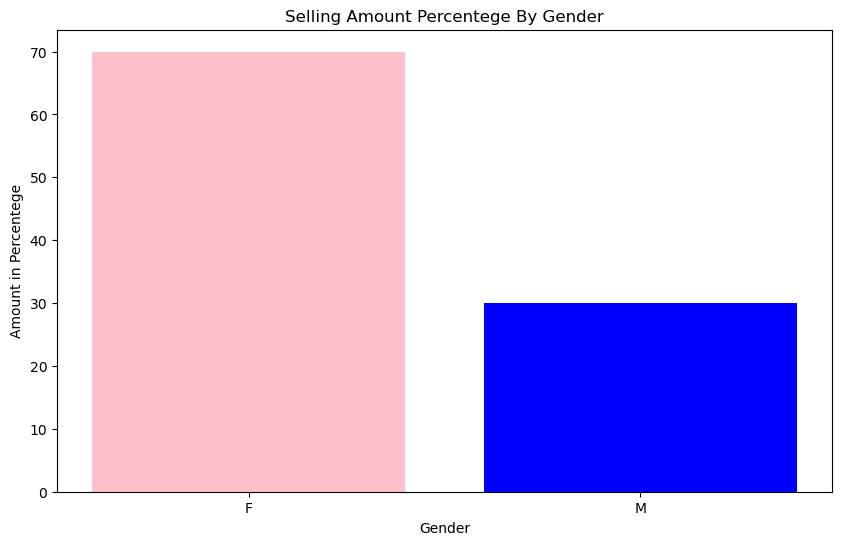

In [28]:
plt.figure(figsize=(10,6))
plt.bar(percentage_sale.index,percentage_sale.values,color=['pink','blue'])
plt.title('Selling Amount Percentege By Gender')
plt.xlabel('Gender')
plt.ylabel('Amount in Percentege')
plt.show()

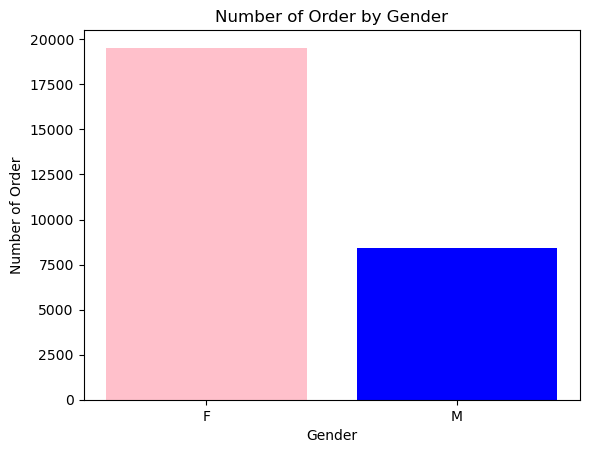

In [29]:
# Analyze the number of orders by gender
gender_order=data.groupby('Gender')['Orders'].sum()
plt.bar(gender_order.index,gender_order.values,color=['pink','blue'])
plt.title('Number of Order by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Order')
plt.show()

After those investigation, we see that Females are buying more than Males and Females and Females are more costly buyer.

In [30]:
# Rename the 'Age Group' column
data.rename(columns={'Age Group':"Age_Group"},inplace=True)

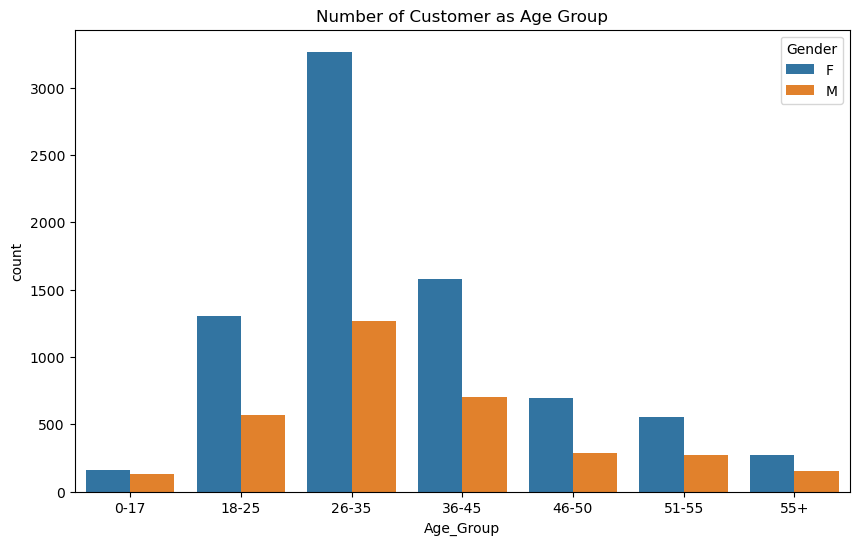

In [31]:
# Countplot for Number of Customers as Age Group
order=data['Age_Group'].value_counts().sort_index().index
plt.figure(figsize=(10,6))
sb.countplot(x='Age_Group',data=data,hue='Gender',order=order)
plt.title('Number of Customer as Age Group')
plt.show()

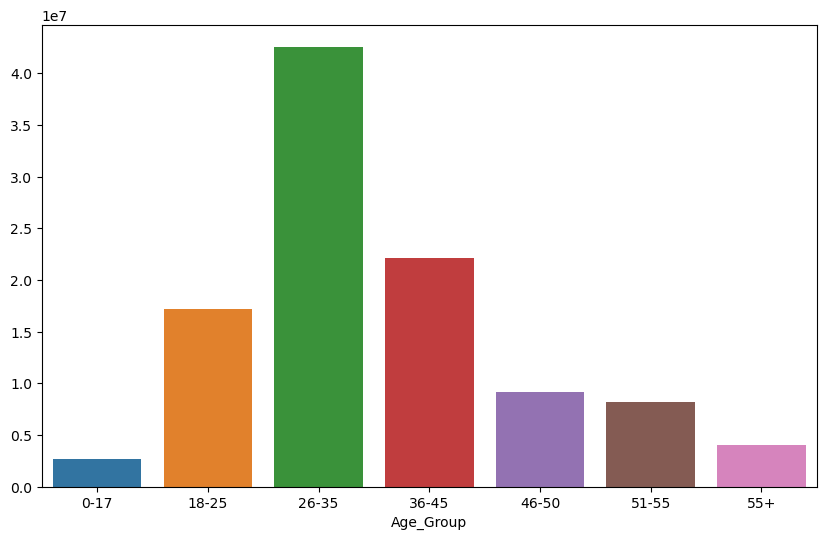

In [32]:
# Analyze sales by age group
age_sale=data.groupby('Age_Group')['Amount'].sum()
plt.figure(figsize=(10,6))
sb.barplot(x=age_sale.index,y=age_sale.values,data=age_sale.reset_index())
plt.show()

By this analysis, we can say that at the age 26-35 females are most buyer of diwali sales

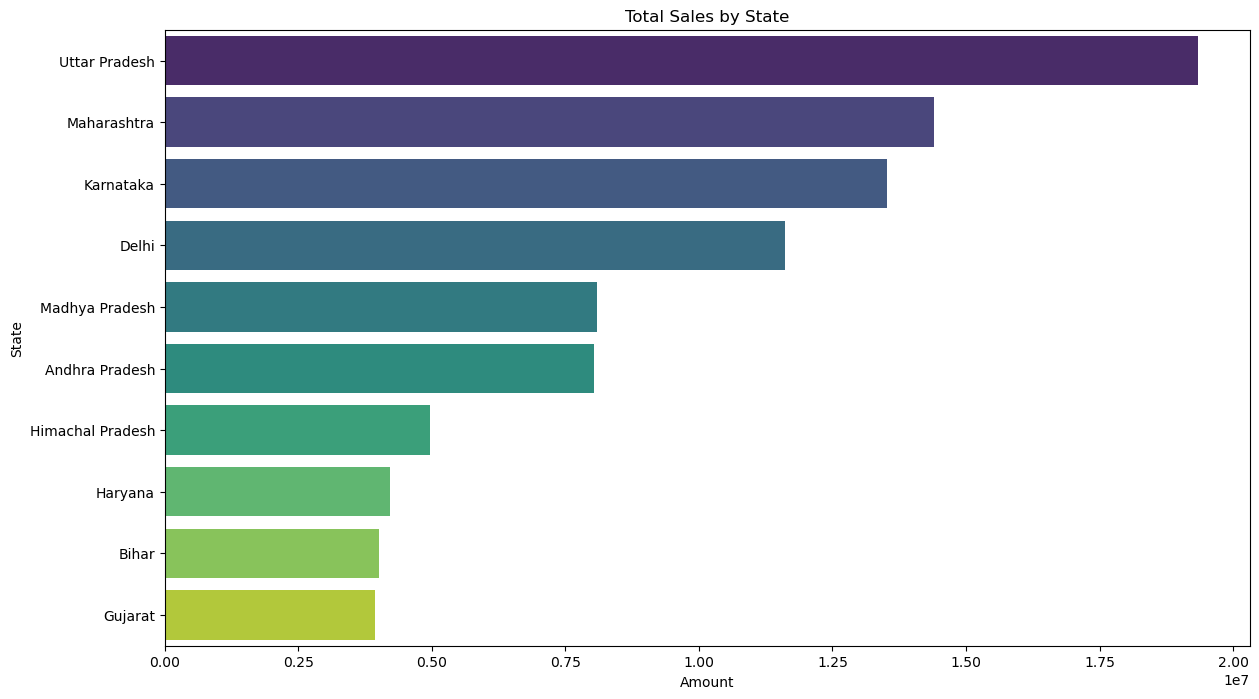

In [33]:
# Analyze total sales by state
state_sale=data.groupby('State')['Amount'].sum().nlargest(10)
plt.figure(figsize=(14,8))
sb.barplot(x=state_sale.values, y=state_sale.index, data=state_sale.reset_index(),orient='h',palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('Amount')
plt.ylabel('State')
plt.show()

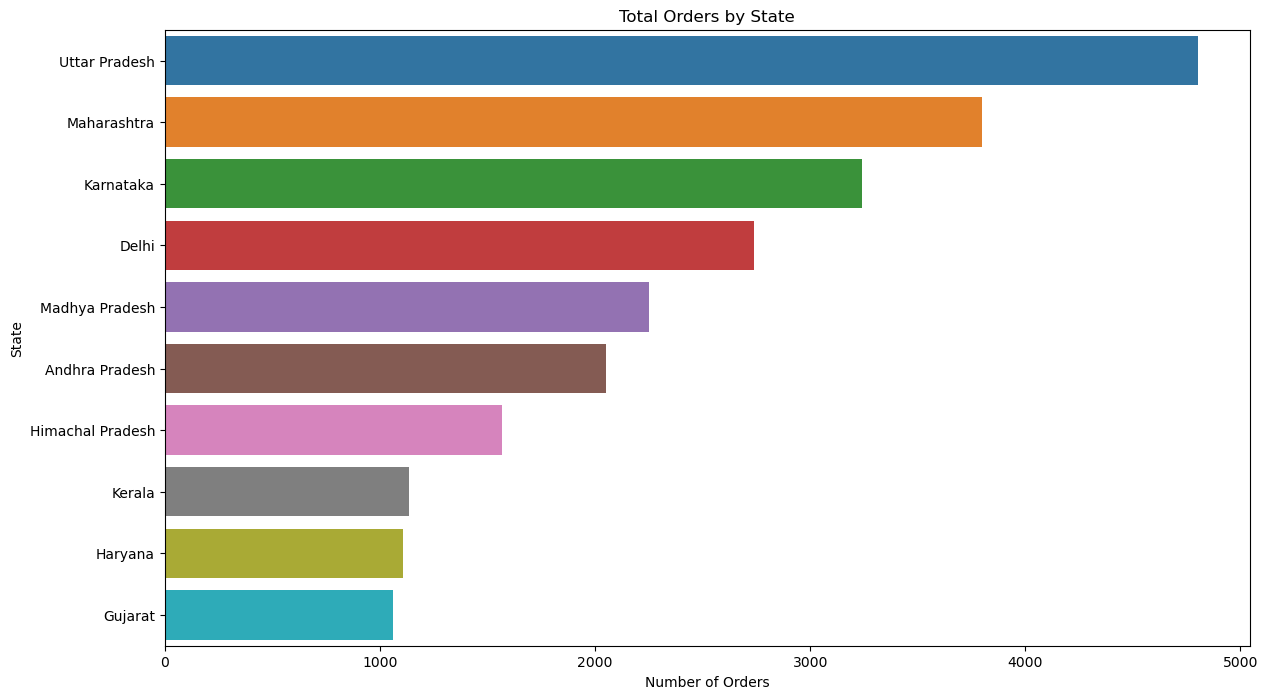

In [34]:
#Total number or order from top 10 state
state_order=data.groupby('State')['Orders'].sum().nlargest(10)
plt.figure(figsize=(14,8))
sb.barplot(x=state_order.values,y=state_order.index,data=state_order.reset_index(),orient='h')
plt.title('Total Orders by State')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.show()

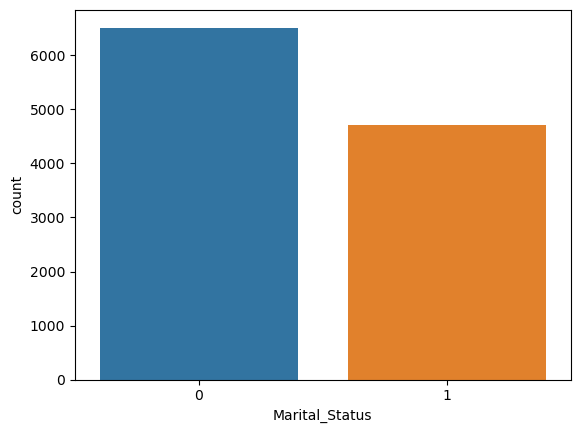

In [35]:
# Countplot for Marital Status
sb.countplot(data['Marital_Status'])
plt.show()

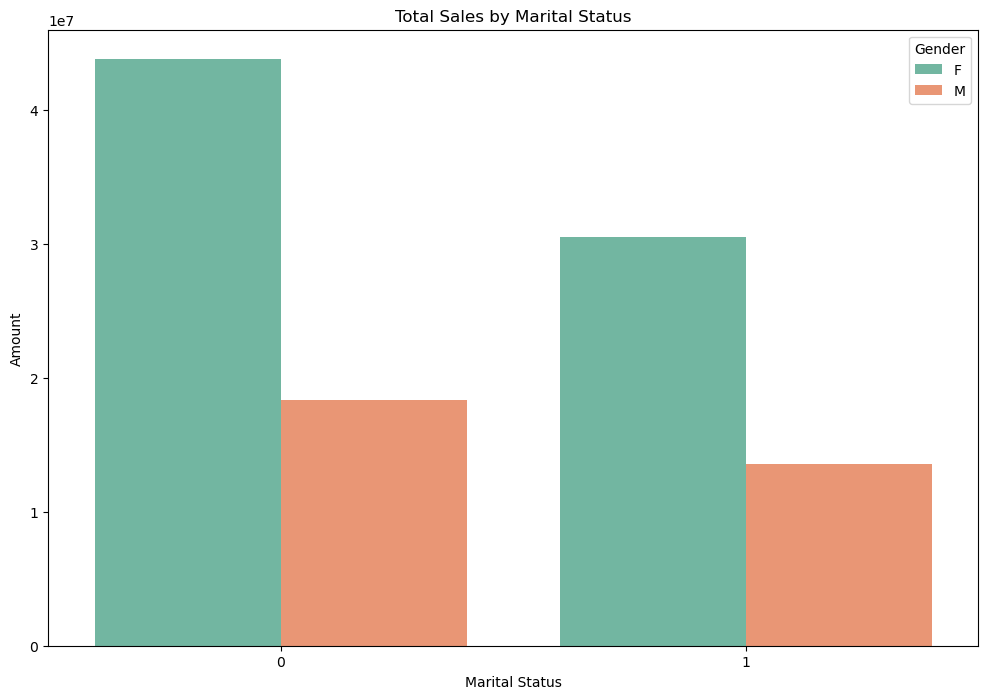

In [36]:
# Analyze total sales by marital status and gender
sale_marital=data.groupby(['Marital_Status','Gender'])['Amount'].sum()
plt.figure(figsize=(12, 8))
sb.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sale_marital.reset_index(), palette='Set2')
plt.title('Total Sales by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.show()

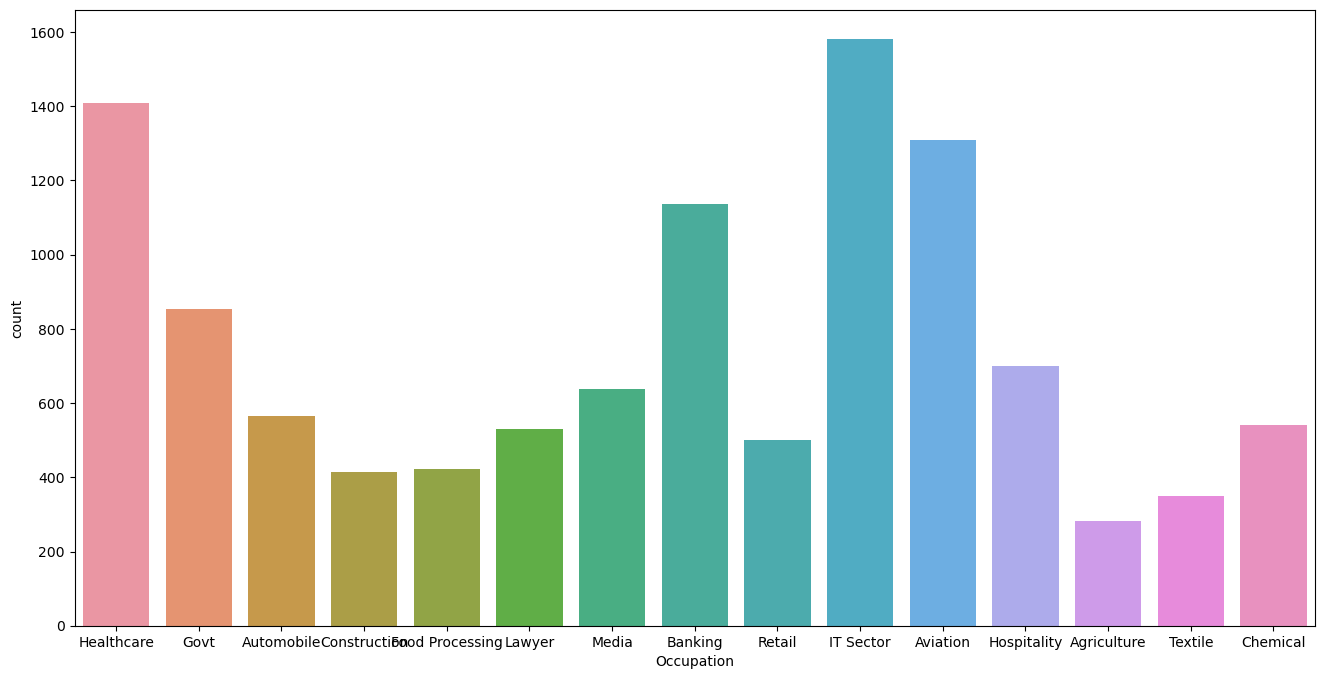

In [37]:
# Countplot for Occupation
plt.figure(figsize=(16,8))
sb.countplot(data.Occupation)
plt.show()

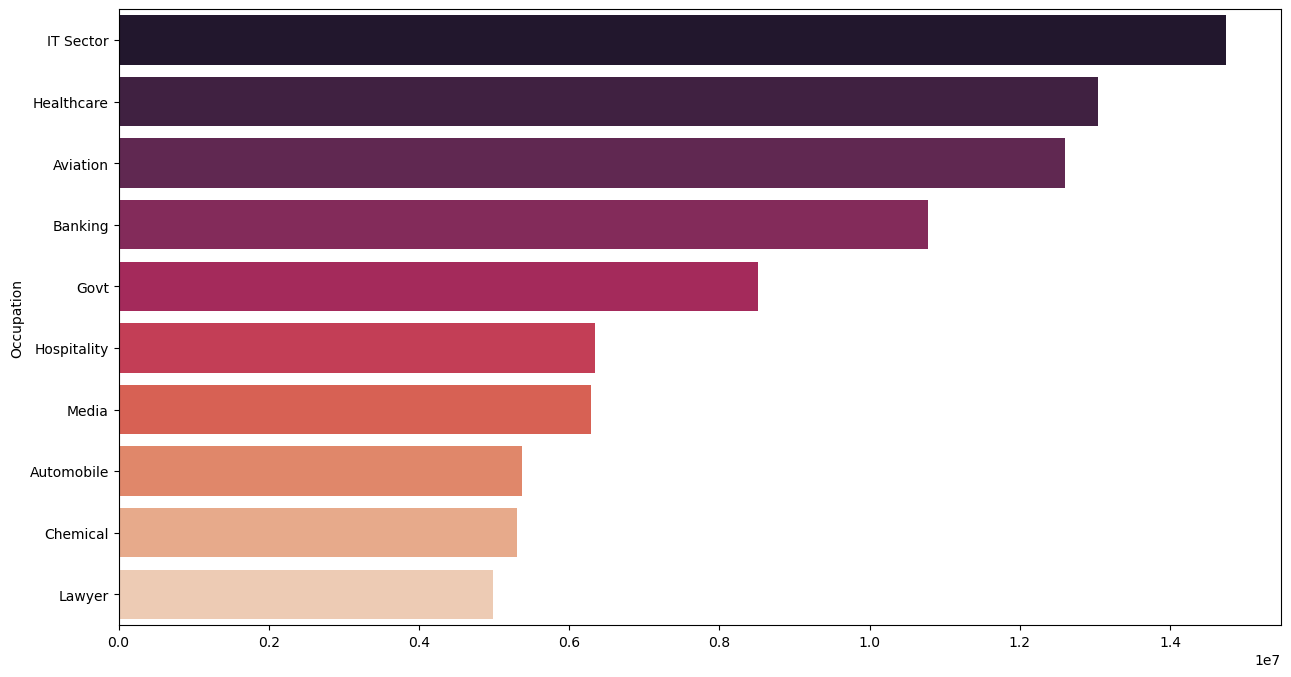

In [38]:
# Analyze total sales by occupation
sale_occupation=data.groupby('Occupation')['Amount'].sum().nlargest(10)
plt.figure(figsize=(15,8))
sb.barplot(x=sale_occupation.values,y=sale_occupation.index,orient='h',data=sale_occupation.reset_index(),palette="rocket")
plt.show()

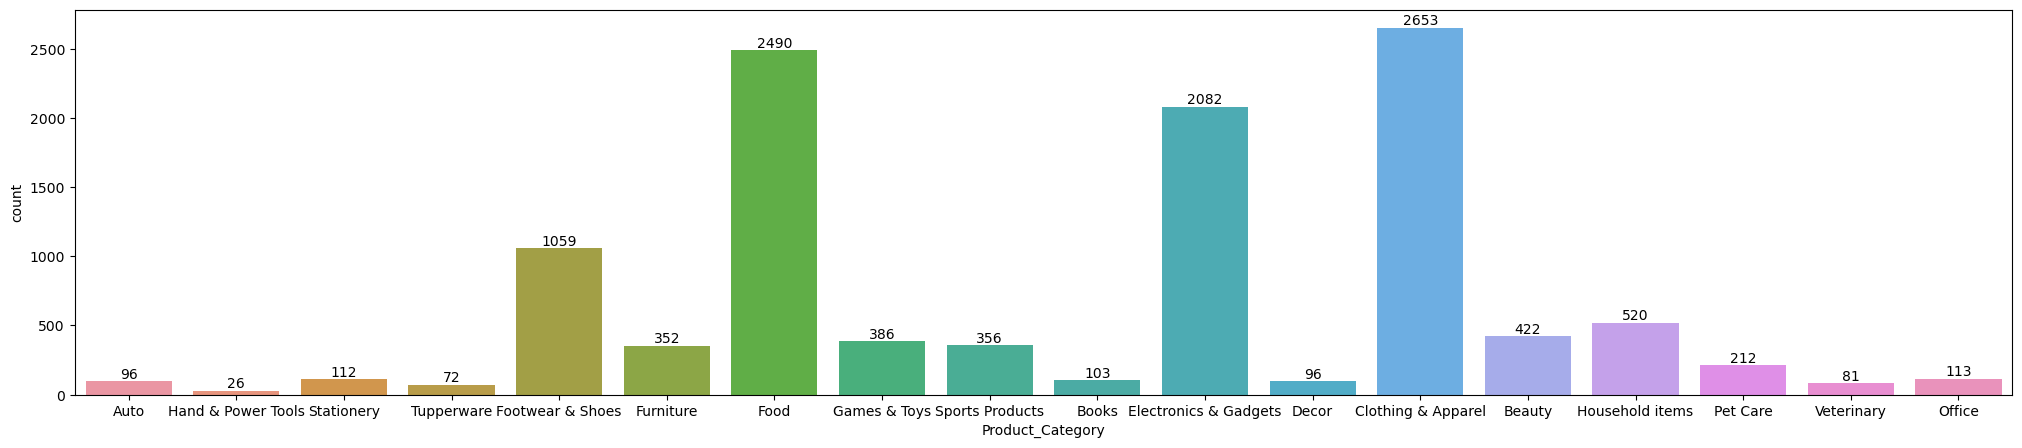

In [39]:
# Countplot for Product Category with labels
plt.figure(figsize=(25,5))
pro=sb.countplot(data['Product_Category'])
for bars in pro.containers:
    pro.bar_label(bars)

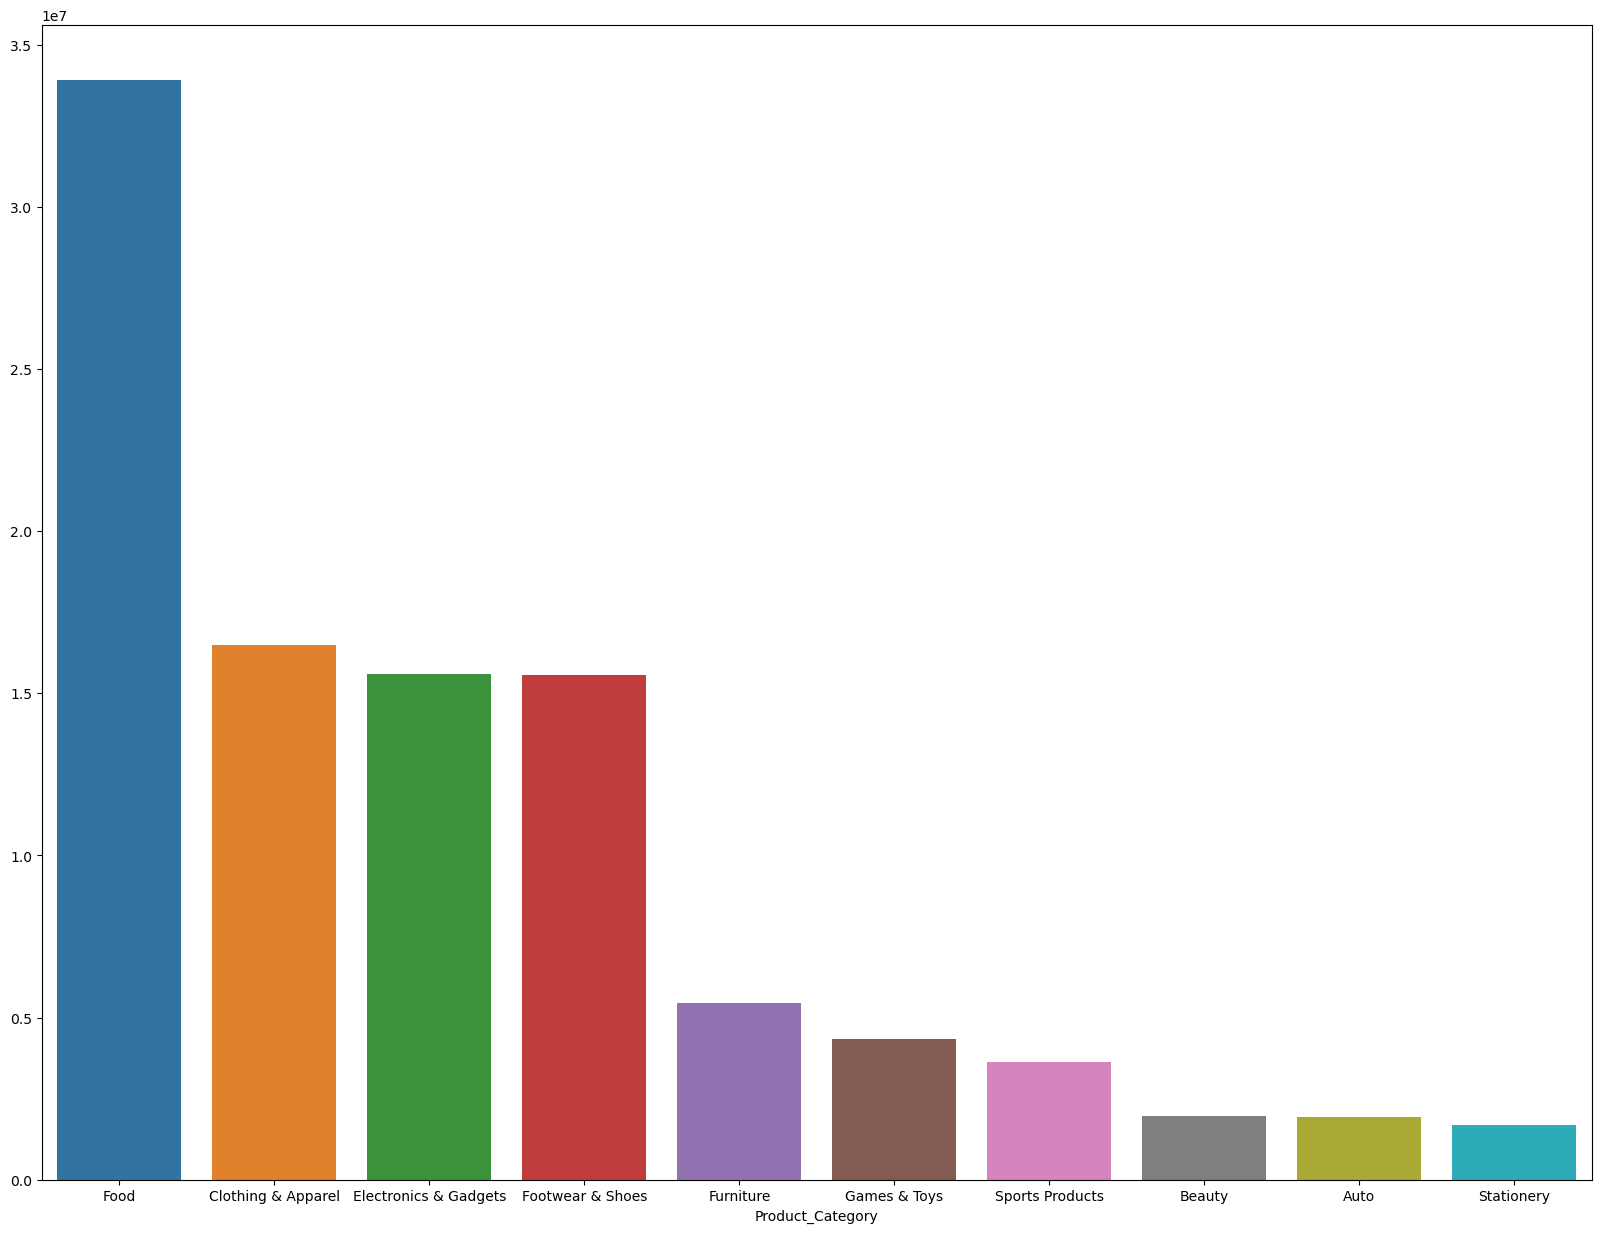

In [40]:
# Analyze total sales by product category
prod_cat_sale=data.groupby('Product_Category')['Amount'].sum().nlargest(10)
plt.figure(figsize=(20,15))
sb.barplot(x=prod_cat_sale.index,y=prod_cat_sale.values,data=prod_cat_sale.reset_index())
plt.show()

Most selling Products are Food, Clothing & Apparel, Electronics and Footwear

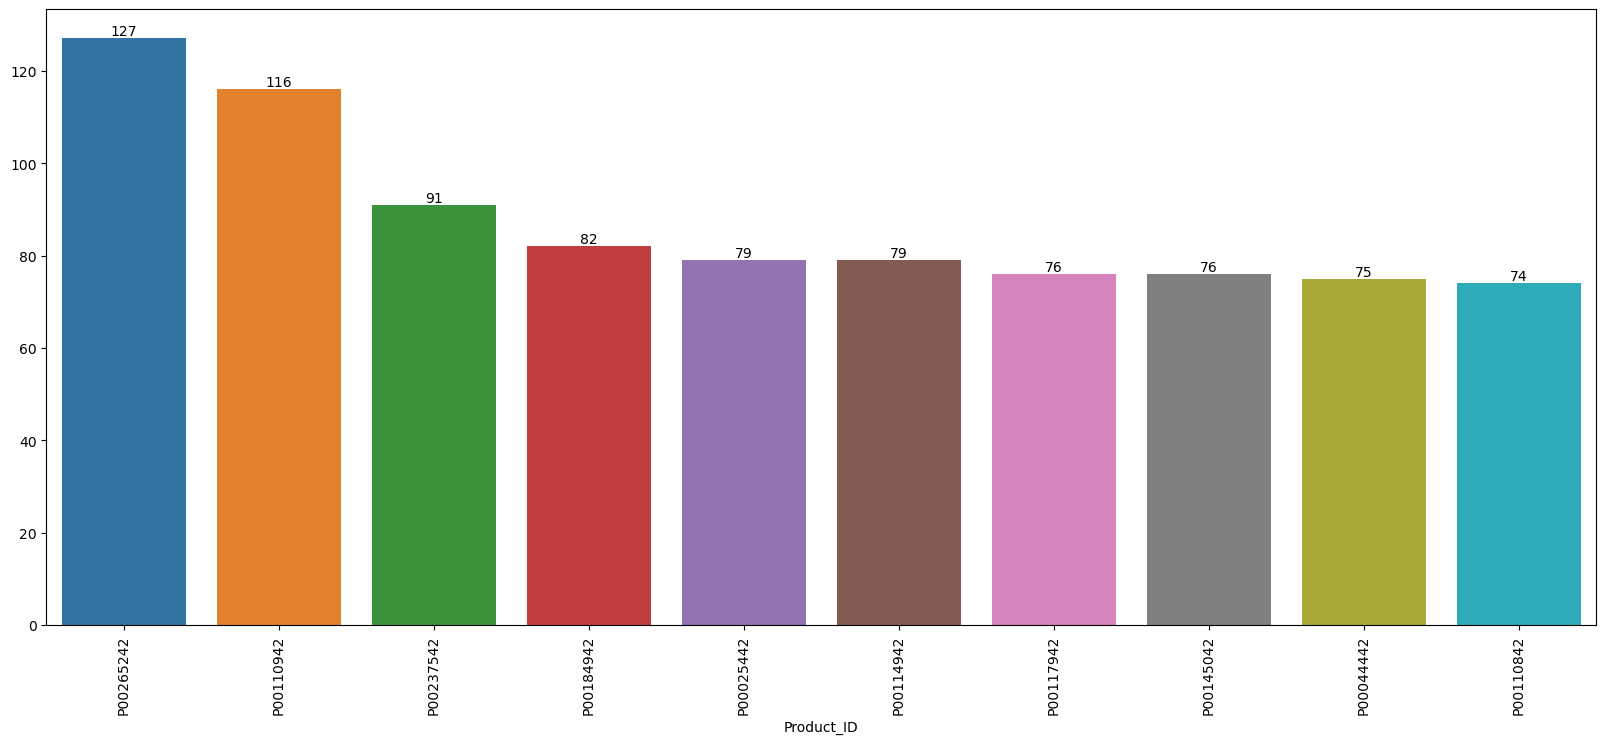

In [41]:
# Analyze the most selling products
sale_prod_id=data.groupby('Product_ID')['Orders'].sum().nlargest(10)
plt.figure(figsize=(20,8))
sb.barplot(x=sale_prod_id.index,y=sale_prod_id.values,data=sale_prod_id.reset_index())
plt.gca().bar_label(plt.gca().containers[0])
plt.xticks(rotation=90)
plt.show()

Unmarried Female of 26-35 aged warking at IT sector,Health Care, Aviation from Uttar Pradesh, Maharasthra, Karnataka likely to buy food, clothing, electronics and footwear